In [1]:
!pip install Librosa
!pip install tensorflow

In [2]:
import IPython.display as ipd
filename=('C:/UrbanSound8K/UrbanSound8K/100032-3-0-0.wav')
ipd.Audio(filename)

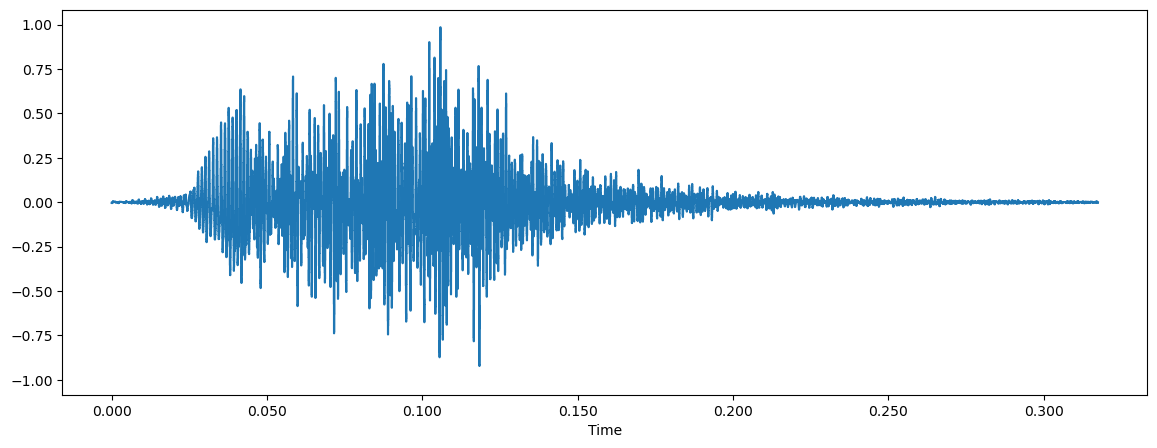

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
data,sample_rate=librosa.core.load('C:/UrbanSound8K/UrbanSound8K/100032-3-0-0.wav')
plt.figure(figsize=(14,5))
librosa.display.waveshow(data,sr=sample_rate)


In [4]:
#importing metadata csv file
import pandas as pd
metadata=pd.read_csv('C:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
1,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
2,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
3,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
4,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
5,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
6,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
7,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
8,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn
9,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn


In [5]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
dog_bark             999
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

Data Preprocessing

In [6]:
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 14)


In [7]:
mfccs

array([[-3.32038788e+02, -1.69587753e+02, -9.02468338e+01,
        -5.69234886e+01, -4.02758713e+01, -5.05441666e+01,
        -9.92239380e+01, -1.59670334e+02, -2.15643402e+02,
        -2.67756226e+02, -3.16286255e+02, -3.55396240e+02,
        -3.90084351e+02, -4.23439941e+02],
       [ 1.19396576e+02,  8.32950363e+01,  6.16887054e+01,
         4.81856956e+01,  3.91407089e+01,  3.40162315e+01,
         3.07527199e+01,  3.43890533e+01,  4.42340164e+01,
         5.63339920e+01,  6.82768860e+01,  7.86100159e+01,
         8.57964630e+01,  9.20208511e+01],
       [-1.02875778e+02, -1.20093826e+02, -1.29499588e+02,
        -1.37105591e+02, -1.43409149e+02, -1.45280487e+02,
        -1.39969147e+02, -1.29590729e+02, -1.26099022e+02,
        -1.23362244e+02, -1.14323471e+02, -1.10078384e+02,
        -1.04549728e+02, -9.31469727e+01],
       [-5.25918121e+01, -6.20533409e+01, -7.39054718e+01,
        -7.90486221e+01, -7.57979660e+01, -7.48995514e+01,
        -7.34803619e+01, -6.70451965e+01, -6.

In [8]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='C:/UrbanSound8K/UrbanSound8K/audio'
metadata=pd.read_csv('C:/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100263-2-0-117.wav,100263,58.5,62.5,1,5,2,children_playing
1,100263-2-0-121.wav,100263,60.5,64.5,1,5,2,children_playing
2,100263-2-0-126.wav,100263,63.0,67.0,1,5,2,children_playing
3,100263-2-0-137.wav,100263,68.5,72.5,1,5,2,children_playing
4,100263-2-0-143.wav,100263,71.5,75.5,1,5,2,children_playing


In [9]:
def features_extractor(file):
    data, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [10]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3549it [01:08, 51.87it/s]C:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [02:36, 63.96it/s]C:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8731it [02:44, 53.17it/s]


In [11]:
#Converting extracted features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=(['feature','Class']))
extracted_features_df.head(-5)

,feature,Class
0,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
1,"[-452.39316, 112.36253, -37.578068, 43.19586, ...",children_playing
2,"[-406.47922, 91.1966, -25.043558, 42.78452, 11...",children_playing
3,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing
4,"[-441.0859, 108.92061, -25.777704, 47.518364, ...",children_playing
...,...,...
8721,"[-84.72026, 128.79701, -40.509216, 27.663576, ...",street_music
8722,"[-344.582, 98.20201, -30.172298, 34.182888, 5....",car_horn
8723,"[-340.3073, 108.315094, -37.5946, 24.809221, -...",car_horn
8724,"[-351.60995, 87.59203, -39.39027, 39.02892, 5....",car_horn


In [12]:
#Split dataset into dependent and independent features
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['Class'].tolist())

In [13]:
##Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [14]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=0)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [16]:
##No. of classes
num_labels=y.shape[1]

In [17]:
###layers of ANN
model=Sequential()
###first layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │           8,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │          60,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           3,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,510 (279.34 KB)

 Trainable params: 71,510 (279.34 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [20]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1622 - loss: 21.2033
Epoch 1: val_loss improved from inf to 2.18679, saving model to saved_models/audio_classification.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1623 - loss: 21.1551 - val_accuracy: 0.1963 - val_loss: 2.1868
Epoch 2/200
203/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2016 - loss: 2.5771
Epoch 2: val_loss improved from 2.18679 to 2.13985, saving model to saved_models/audio_classification.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2016 - loss: 2.5697 - val_accuracy: 0.2322 - val_loss: 2.1398
Epoch 3/200
212/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2397 - loss: 2.1647
Epoch 3: val_loss improved from 2.13985 to 1.98050, saving model to saved_models/audio_classification.keras
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2398 - loss: 2.1643 - val_accuracy: 0.3087 - val_loss: 1.9805
Epoch 4/200
190/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [21]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
test_accuracy[1]

0.8948464393615723

In [22]:
##Model predicting class
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[4 1 6 ... 7 5 8]


In [23]:
import IPython.display as ipd
filename=("C:/UrbanSound8K/UrbanSound8K/14387-9-0-15.wav")
ipd.Audio(filename)

In [24]:
filename="C:/UrbanSound8K/UrbanSound8K/14387-9-0-15.wav"
##Preprocessing audiofile
audio, sample_rate = librosa.core.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)

##reshape MFCC feature to 2-D array
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

##predicted_label = model.predict(mfccs_scaled_features)

x_predict=model.predict(mfccs_scaled_features)
x_label=np.argmax(x_predict,axis=1)
print(x_label)
prediction_class=labelencoder.inverse_transform(x_label)
prediction_class

[-317.80743     158.84431      -7.8308206    39.62621      -3.0769029
   -0.39469874    4.628633     11.348094      2.6572006    -2.3324416
   17.067583      7.080102      6.4992504     1.98673       1.3234887
    8.727966      5.2164516     5.9689026    -5.084938     -2.6112342
   -1.8349239     3.1345532     2.7855914     4.000883      1.1125592
   -3.1095183    -3.8233416     5.63856      -0.5054775    -2.9793928
    1.5528826     9.117689      9.156756      1.3443911     2.0258229
    0.3984364    -9.457513     -4.8549147     4.111599      3.1215594 ]
[[-317.80743     158.84431      -7.8308206    39.62621      -3.0769029
    -0.39469874    4.628633     11.348094      2.6572006    -2.3324416
    17.067583      7.080102      6.4992504     1.98673       1.3234887
     8.727966      5.2164516     5.9689026    -5.084938     -2.6112342
    -1.8349239     3.1345532     2.7855914     4.000883      1.1125592
    -3.1095183    -3.8233416     5.63856      -0.5054775    -2.9793928
     1.55288

array(['street_music'], dtype='<U16')